In [2]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="ndy5ULCgBTZGsVMvgZy+9EI2RHDcpxn0oWENGlwssSw=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [34]:
#https://pypi.org/project/beautifulsoup4/
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 印出表格內容
#print(rate_table)

#取得所有幣別和現金匯率資料            #一個表格只有一個tbody
currency_rows = rate_table.tbody.find_all('tr') #跳過表頭行
#print(currency_rows)

for row in currency_rows: #row-->tr
    #取行中的幣別資料
    #print(row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip())  #strip()字串去除前後空白 lstrip()去除左邊空白 rstrip()去除右邊空白 rstrip()去除右邊空白
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip() #提取到的文字前後的空白（例如空格、換行符號）刪除
    
    #取行中的本行現金買入匯入
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()

    #取行中的本行現金賣出匯入
    currencya_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    print(f"幣別:{currency}, 現金買入:{currency_get}, 現金賣出:{currencya_send}")
    print('-----------')

幣別:美金 (USD), 現金買入:32.345, 現金賣出:33.015
-----------
幣別:港幣 (HKD), 現金買入:4.058, 現金賣出:4.262
-----------
幣別:英鎊 (GBP), 現金買入:40.23, 現金賣出:42.35
-----------
幣別:澳幣 (AUD), 現金買入:20.49, 現金賣出:21.27
-----------
幣別:加拿大幣 (CAD), 現金買入:22.57, 現金賣出:23.48
-----------
幣別:新加坡幣 (SGD), 現金買入:23.92, 現金賣出:24.83
-----------
幣別:瑞士法郎 (CHF), 現金買入:35.66, 現金賣出:36.86
-----------
幣別:日圓 (JPY), 現金買入:0.2101, 現金賣出:0.2229
-----------
幣別:南非幣 (ZAR), 現金買入:-, 現金賣出:-
-----------
幣別:瑞典幣 (SEK), 現金買入:-, 現金賣出:-
-----------
幣別:紐元 (NZD), 現金買入:18.36, 現金賣出:19.21
-----------
幣別:泰幣 (THB), 現金買入:0.8474, 現金賣出:1.0374
-----------
幣別:菲國比索 (PHP), 現金買入:0.5, 現金賣出:0.632
-----------
幣別:印尼幣 (IDR), 現金買入:0.00168, 現金賣出:0.00238
-----------
幣別:歐元 (EUR), 現金買入:33.48, 現金賣出:34.82
-----------
幣別:韓元 (KRW), 現金買入:0.0211, 現金賣出:0.025
-----------
幣別:越南盾 (VND), 現金買入:0.00104, 現金賣出:0.00145
-----------
幣別:馬來幣 (MYR), 現金買入:6.387, 現金賣出:7.912
-----------
幣別:人民幣 (CNY), 現金買入:4.421, 現金賣出:4.583
-----------


In [45]:
#https://pypi.org/project/beautifulsoup4/
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

#取得所有幣別和現金匯率資料            #一個表格只有一個tbody
currency_rows = rate_table.tbody.find_all('tr') #跳過表頭行

rates:list[dict] = []

for row in currency_rows: #row-->tr
    currency_dict = {}
    #取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip() #提取到的文字前後的空白（例如空格、換行符號）刪除
    currency_dict["幣別"]= currency

    #取行中的本行現金買入匯入
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"]= currency_get

    #取行中的本行現金賣出匯入
    currencya_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"]= currencya_send

    #print(f"幣別:{currency}, 現金買入:{currency_get}, 現金賣出:{currencya_send}")
    #print('--'*60)
    rates.append(currency_dict)

pprint(rates)

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},


In [64]:
def filter_func(item:dict) -> bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True

filtered_rates = list(filter(filter_func, rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.421', '現金賣出': '4.583'}]

In [ ]:
def map_func(item:dict) -> dict: #map()函數將一個函數應用於一個或多個序列的每一個元素，並返回一個列表
    item["現金買入"] = float(item["現金買入"]) #float()將字串轉換為浮點數
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list = list(map(map_func, filtered_rates))
cleared_list

#資料分析STEP 1: 資料清洗

[{'幣別': '美金 (USD)', '現金買入': 32.345, '現金賣出': 33.015},
 {'幣別': '港幣 (HKD)', '現金買入': 4.058, '現金賣出': 4.262},
 {'幣別': '英鎊 (GBP)', '現金買入': 40.23, '現金賣出': 42.35},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.49, '現金賣出': 21.27},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.57, '現金賣出': 23.48},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 23.92, '現金賣出': 24.83},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 35.66, '現金賣出': 36.86},
 {'幣別': '日圓 (JPY)', '現金買入': 0.2101, '現金賣出': 0.2229},
 {'幣別': '紐元 (NZD)', '現金買入': 18.36, '現金賣出': 19.21},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8474, '現金賣出': 1.0374},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.5, '現金賣出': 0.632},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 33.48, '現金賣出': 34.82},
 {'幣別': '韓元 (KRW)', '現金買入': 0.0211, '現金賣出': 0.025},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00104, '現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.387, '現金賣出': 7.912},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.421, '現金賣出': 4.583}]

In [76]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入", ascending=False) #ascending=False 降序排列
df.head()

,幣別,現金買入,現金賣出
2,英鎊 (GBP),40.230,42.350
6,瑞士法郎 (CHF),35.660,36.860
12,歐元 (EUR),33.480,34.820
0,美金 (USD),32.345,33.015
5,新加坡幣 (SGD),23.920,24.830


In [77]:
df.tail()

,幣別,現金買入,現金賣出
10,菲國比索 (PHP),0.50000,0.63200
7,日圓 (JPY),0.21010,0.22290
13,韓元 (KRW),0.02110,0.02500
11,印尼幣 (IDR),0.00168,0.00238
14,越南盾 (VND),0.00104,0.00145


In [80]:
#subscript 
type(df["現金買入"])   #pandas.core.series.Series    series是一元資料
df["現金買入"]

2     40.23000
6     35.66000
12    33.48000
0     32.34500
5     23.92000
4     22.57000
3     20.49000
8     18.36000
15     6.38700
16     4.42100
1      4.05800
9      0.84740
10     0.50000
7      0.21010
13     0.02110
11     0.00168
14     0.00104
Name: 現金買入, dtype: float64

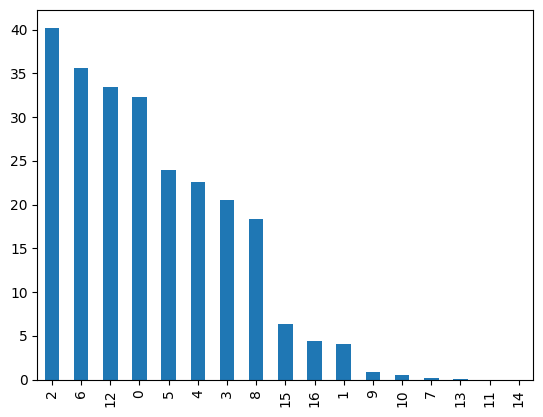

In [82]:
#https://github.com/roberthsu2003/PythonForDataAnalysis/blob/master/%E7%B9%AA%E5%9C%96%E5%92%8C%E8%A6%96%E8%A6%BA%E5%B1%95%E7%A4%BA/.ipynb_checkpoints/visualization-checkpoint.ipynb
import matplotlib.pyplot as plt
#1. 製作figure
df["現金買入"].plot(kind='bar')
plt.show()

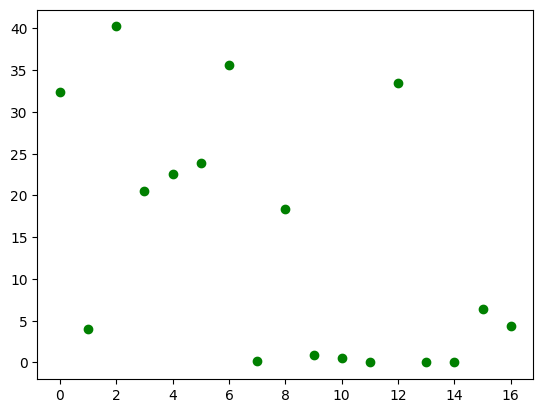

In [ ]:
import matplotlib.pyplot as plt
#1. 製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(df["現金買入"],'go')          #只有點
#ax_1.plot(df["現金買入"],'go-')        #有點有線
#ax_1.plot(df["現金買入"],'go--')       #有點有虛線
plt.show()